In [1]:
import h5py

# Open the file as readonly
h5f = h5py.File('SVHN_single_grey1.h5', 'r')

h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,MaxPooling2D,Dropout,Conv2D
from tensorflow.keras import optimizers
import warnings
warnings.filterwarnings('ignore')

In [3]:
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

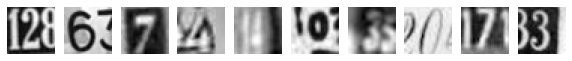

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [5]:
X_train.shape

(42000, 32, 32)

In [6]:
y_train.shape

(42000,)

In [7]:
X_train = X_train.reshape(X_train.shape[0], 1024, 1)
X_test = X_test.reshape(X_test.shape[0], 1024, 1)

# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print('Resized Training set', X_train.shape, y_train.shape)
print('Resized Test set', X_test.shape, y_test.shape)

Resized Training set (42000, 1024, 1) (42000,)
Resized Test set (18000, 1024, 1) (18000,)


In [8]:
from tensorflow.keras.utils import to_categorical
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# no.of classes
num_classes = y_test.shape[1] 
print("The number of classes in this dataset are:",num_classes)

The number of classes in this dataset are: 10


In [10]:
model = Sequential()  
model.add(Flatten())
model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [13]:
sgd = optimizers.Adam(lr=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) 

In [15]:
training_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=3000, verbose=2)

Epoch 1/50
14/14 - 1s - loss: 1.6845 - accuracy: 0.4449 - val_loss: 1.6408 - val_accuracy: 0.4468 - 981ms/epoch - 70ms/step
Epoch 2/50
14/14 - 1s - loss: 1.6138 - accuracy: 0.4677 - val_loss: 1.5571 - val_accuracy: 0.4871 - 961ms/epoch - 69ms/step
Epoch 3/50
14/14 - 1s - loss: 1.5403 - accuracy: 0.4936 - val_loss: 1.5017 - val_accuracy: 0.5068 - 976ms/epoch - 70ms/step
Epoch 4/50
14/14 - 1s - loss: 1.4825 - accuracy: 0.5172 - val_loss: 1.4458 - val_accuracy: 0.5286 - 930ms/epoch - 66ms/step
Epoch 5/50
14/14 - 1s - loss: 1.4252 - accuracy: 0.5345 - val_loss: 1.4134 - val_accuracy: 0.5442 - 888ms/epoch - 63ms/step
Epoch 6/50
14/14 - 1s - loss: 1.4017 - accuracy: 0.5419 - val_loss: 1.3559 - val_accuracy: 0.5646 - 913ms/epoch - 65ms/step
Epoch 7/50
14/14 - 1s - loss: 1.3439 - accuracy: 0.5683 - val_loss: 1.3463 - val_accuracy: 0.5696 - 915ms/epoch - 65ms/step
Epoch 8/50
14/14 - 1s - loss: 1.3122 - accuracy: 0.5787 - val_loss: 1.2886 - val_accuracy: 0.5921 - 920ms/epoch - 66ms/step
Epoch 9/

In [16]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.9345030188560486
Accuracy: 0.7166110873222351


Text(0.5, 1.0, 'Training and validation loss')

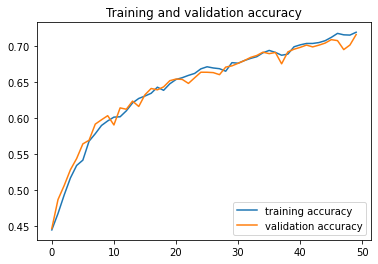

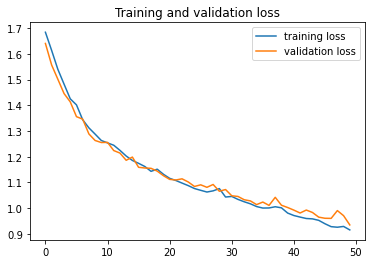

In [17]:
accuracy      = training_history.history['accuracy']
val_accuracy  = training_history.history['val_accuracy']
loss     = training_history.history['loss']
val_loss = training_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  ( epochs, accuracy, label = 'training accuracy' )
plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, loss, label = 'training loss' )
plt.plot  ( epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss'   )